In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

In [2]:
np.random.seed(1);np.random.rand(40)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01, 4.19194514e-01, 6.85219500e-01,
       2.04452250e-01, 8.78117436e-01, 2.73875932e-02, 6.70467510e-01,
       4.17304802e-01, 5.58689828e-01, 1.40386939e-01, 1.98101489e-01,
       8.00744569e-01, 9.68261576e-01, 3.13424178e-01, 6.92322616e-01,
       8.76389152e-01, 8.94606664e-01, 8.50442114e-02, 3.90547832e-02,
       1.69830420e-01, 8.78142503e-01, 9.83468338e-02, 4.21107625e-01,
       9.57889530e-01, 5.33165285e-01, 6.91877114e-01, 3.15515631e-01,
       6.86500928e-01, 8.34625672e-01, 1.82882773e-02, 7.50144315e-01])

In [3]:
x = np.random.rand(40)

In [4]:
x.shape

(40,)

In [5]:
x_0 = x.reshape(10,4)

In [6]:
x_0 

array([[0.98886109, 0.74816565, 0.28044399, 0.78927933],
       [0.10322601, 0.44789353, 0.9085955 , 0.29361415],
       [0.28777534, 0.13002857, 0.01936696, 0.67883553],
       [0.21162812, 0.26554666, 0.49157316, 0.05336255],
       [0.57411761, 0.14672857, 0.58930554, 0.69975836],
       [0.10233443, 0.41405599, 0.69440016, 0.41417927],
       [0.04995346, 0.53589641, 0.66379465, 0.51488911],
       [0.94459476, 0.58655504, 0.90340192, 0.1374747 ],
       [0.13927635, 0.80739129, 0.39767684, 0.1653542 ],
       [0.92750858, 0.34776586, 0.7508121 , 0.72599799]])

In [7]:
df = pd.DataFrame((x_0), columns=['col_1','col_2','col_3','col_4'])

In [8]:
df

,col_1,col_2,col_3,col_4
0,0.988861,0.748166,0.280444,0.789279
1,0.103226,0.447894,0.908596,0.293614
2,0.287775,0.130029,0.019367,0.678836
3,0.211628,0.265547,0.491573,0.053363
4,0.574118,0.146729,0.589306,0.699758
5,0.102334,0.414056,0.694400,0.414179
6,0.049953,0.535896,0.663795,0.514889
7,0.944595,0.586555,0.903402,0.137475
8,0.139276,0.807391,0.397677,0.165354
9,0.927509,0.347766,0.750812,0.725998


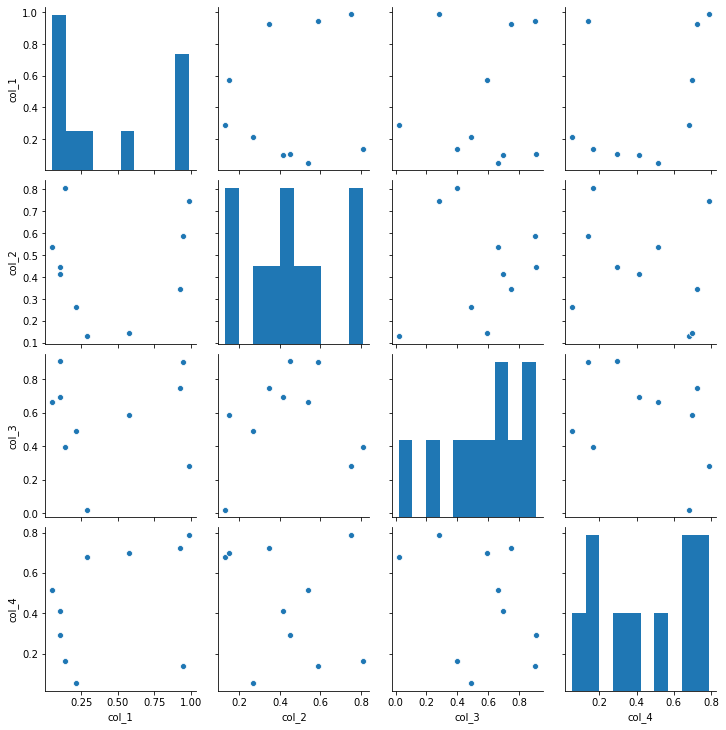

In [9]:
sns.pairplot(df)

In [10]:
X = df.drop(['col_3'], axis=1)
X

,col_1,col_2,col_4
0,0.988861,0.748166,0.789279
1,0.103226,0.447894,0.293614
2,0.287775,0.130029,0.678836
3,0.211628,0.265547,0.053363
4,0.574118,0.146729,0.699758
5,0.102334,0.414056,0.414179
6,0.049953,0.535896,0.514889
7,0.944595,0.586555,0.137475
8,0.139276,0.807391,0.165354
9,0.927509,0.347766,0.725998


In [43]:
Y = df.col_3
Y

0    0.280444
1    0.908596
2    0.019367
3    0.491573
4    0.589306
5    0.694400
6    0.663795
7    0.903402
8    0.397677
9    0.750812
Name: col_3, dtype: float64

In [41]:
df.col_3.mean()

0.5699370807568528

In [44]:
Y_0 = df.col_3 > 0.56

In [45]:
Y_0

0    False
1     True
2    False
3    False
4     True
5     True
6     True
7     True
8    False
9     True
Name: col_3, dtype: bool

In [59]:
Y_1 = Y_0*1

In [60]:
Y_1

0    0
1    1
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    1
Name: col_3, dtype: int32

# Decision Trees and Random Forests

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X 
Y # Target

0    0.280444
1    0.908596
2    0.019367
3    0.491573
4    0.589306
5    0.694400
6    0.663795
7    0.903402
8    0.397677
9    0.750812
Name: col_3, dtype: float64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_1, test_size=0.10)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dtree = DecisionTreeClassifier()

In [64]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
predictions = dtree.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [57]:
print(confusion_matrix(y_test,predictions))

[[0 1]
 [0 0]]


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X

,col_1,col_2,col_4
0,0.988861,0.748166,0.789279
1,0.103226,0.447894,0.293614
2,0.287775,0.130029,0.678836
3,0.211628,0.265547,0.053363
4,0.574118,0.146729,0.699758
5,0.102334,0.414056,0.414179
6,0.049953,0.535896,0.514889
7,0.944595,0.586555,0.137475
8,0.139276,0.807391,0.165354
9,0.927509,0.347766,0.725998


In [87]:
Y

0    0.280444
1    0.908596
2    0.019367
3    0.491573
4    0.589306
5    0.694400
6    0.663795
7    0.903402
8    0.397677
9    0.750812
Name: col_3, dtype: float64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [89]:
dtree = DecisionTreeRegressor()

In [90]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [91]:
predictions = dtree.predict(X_test)

In [93]:
predictions

array([0.66379465, 0.49157316, 0.66379465])

In [94]:
y_test

5    0.694400
8    0.397677
1    0.908596
Name: col_3, dtype: float64

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

In [ ]:
ValueError: continuous is not supported
# https://www.kaggle.com/questions-and-answers/92771

In [ ]:
Hi,
as far as i understand, you seem to be calling the accuracy_score method from sklearn.metrics;
if that's the case, you should know that such accuracy score is only available for Classification problems: when predicting classes or categories.
In the case of a Regression problem: predicting continuous values (float or integer …), you should try other appropriate metrics; such as:

R_squared (R2) , which is the proportion of variation in the outcome that is explained by the predictor variables.
Root Mean Squared Error (RMSE), which measures the average error performed by the model in predicting the outcome for an observation.
Residual Standard Error (RSE) or SIGMA, wich is the RMSE adjusted for the number of predictors in the model. The lower the RSE, the better the model.
Mean Absolute Error (MAE), like the RMSE, the MAE measures the prediction error. It is the average absolute difference between observed and predicted outcomes, however MAE is less sensitive to outliers compared to RMSE.

In [95]:
## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

SyntaxError: invalid syntax (<ipython-input-95-35abd5c0678d>, line 3)

In [96]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [97]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

NameError: name 'StringIO' is not defined

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

In [ ]:
print(classification_report(y_test,rfc_pred))